In [1]:
#Causual forest based on codes from https://towardsdatascience.com/causal-machine-learning-for-econometrics-causal-forests-5ab3aec825a7
import pandas as pd


In [3]:
#read stata file. I have created seperate file for different outcome varibales
df = pd.read_stata("C:/Users/aladesuru/Downloads/Punjab outcome variables_rice_yld.dta")

print (df)

      HH_ID  num_plot plot_soilfertility  plot_erosionprobl  \
0      1001       3.0       high fertile                0.0   
1      1002       1.0       high fertile                0.0   
2      1003       3.0       high fertile                0.0   
3      1004       3.0       high fertile                0.0   
4      1005       2.0       high fertile                0.0   
..      ...       ...                ...                ...   
975  151026       1.0       high fertile                0.0   
976  151029       1.0       high fertile                0.0   
977  152003       2.0       high fertile                1.0   
978  152008       2.0       high fertile                0.0   
979  152818       1.0     medium fertile                0.0   

     plot_waterloggprob  age_hhmember               edun_hhmember  \
0                   0.0            69        Completed 10th grade   
1                   0.0            70         Completed bachelors   
2                   0.0            7

In [4]:
#set varibales
treatment = 'levelled_2021'
outcome = 'kharif_rice_yld_ha'


In [5]:
#Dropping observations if the covariate varibales are missing
list = [ "age_hhmember", "edun_hhmember", 'caste_cat2',  'religion_new', "total_num_adult_members_HH", "women_share", 
        'non_farm_binary', "asset_index", "plot_area_ha", "plot_dist_lll", "num_plot", 'plot_soiltype2', 
        'plot_soilfertility', 'plot_erosionprobl','plot_waterloggprob', "sp_lll_new", 'access_govt_ext' , 'access_kvk',
        'access_prog_farmer', 'access_ngo', 'access_farmer_grp', 'access_input_dealer', "datairrwater_tbl_21", 
        "simpson_index_kh", "simpson_index_rb", "datadstdst_dhq", 'levelled_2021' ]
df = df.dropna(subset = list, axis = 0)

In [6]:
categorical = ['levelled_2021', 'caste_cat2',  'religion_new',  'non_farm_binary', 'plot_soiltype2', 
               'plot_soilfertility', 'plot_erosionprobl', 'plot_waterloggprob', 'access_govt_ext' , 
               'access_kvk', 'access_prog_farmer', 'access_ngo', 'access_farmer_grp', 'access_input_dealer']

In [7]:
df[categorical] = df[categorical].astype('category')

In [8]:
dummy = pd.get_dummies(df, columns = categorical)

In [9]:
dummy.columns

Index(['HH_ID', 'num_plot', 'age_hhmember', 'edun_hhmember',
       'total_num_adult_members_HH', 'asset_index', 'plot_no',
       'datairrwater_tbl_21', 'sp_lll_new', 'plot_rabi_largest_plot_id_rabi',
       'women_share', 'datadstdst_dhq', 'simpson_index_kh', 'simpson_index_rb',
       'levelled_3_yrs', 'plot_dist_lll', 'plot_area_ha',
       'plot_kharif_crop_name', 'kharif_rice_yld_ha', 'levelled_before2',
       'irrigation_hrs_wheat_ha', 'irrigation_hrs_rice_ha',
       'rabi_wheat_yld_ha', 'levelled_2020', 'levelled_kharif',
       'levelled_2021_0.0', 'levelled_2021_1.0',
       'caste_cat2_Marginalised caste', 'caste_cat2_Non marginalised caste',
       'religion_new_0.0', 'religion_new_1.0', 'non_farm_binary_0.0',
       'non_farm_binary_1.0', 'plot_soiltype2_clayey',
       'plot_soiltype2_Loamy/sandy', 'plot_soilfertility_low fertile',
       'plot_soilfertility_medium fertile', 'plot_soilfertility_high fertile',
       'plot_erosionprobl_0.0', 'plot_erosionprobl_1.0',
    

In [10]:
df = dummy

In [11]:
a = df.columns


In [12]:
pd.options.display.max_seq_items = 2000

In [13]:
a

Index(['HH_ID', 'num_plot', 'age_hhmember', 'edun_hhmember',
       'total_num_adult_members_HH', 'asset_index', 'plot_no',
       'datairrwater_tbl_21', 'sp_lll_new', 'plot_rabi_largest_plot_id_rabi',
       'women_share', 'datadstdst_dhq', 'simpson_index_kh', 'simpson_index_rb',
       'levelled_3_yrs', 'plot_dist_lll', 'plot_area_ha',
       'plot_kharif_crop_name', 'kharif_rice_yld_ha', 'levelled_before2',
       'irrigation_hrs_wheat_ha', 'irrigation_hrs_rice_ha',
       'rabi_wheat_yld_ha', 'levelled_2020', 'levelled_kharif',
       'levelled_2021_0.0', 'levelled_2021_1.0',
       'caste_cat2_Marginalised caste', 'caste_cat2_Non marginalised caste',
       'religion_new_0.0', 'religion_new_1.0', 'non_farm_binary_0.0',
       'non_farm_binary_1.0', 'plot_soiltype2_clayey',
       'plot_soiltype2_Loamy/sandy', 'plot_soilfertility_low fertile',
       'plot_soilfertility_medium fertile', 'plot_soilfertility_high fertile',
       'plot_erosionprobl_0.0', 'plot_erosionprobl_1.0',
    

In [14]:
covariates= [ "age_hhmember", 'caste_cat2_Non marginalised caste',  'religion_new_1.0', 
             "total_num_adult_members_HH", "women_share", 'non_farm_binary_1.0', "asset_index", "plot_area_ha", 
             "plot_dist_lll", "num_plot", 'plot_soiltype2_Loamy/sandy', 'plot_soilfertility_medium fertile', 
             'plot_soilfertility_high fertile', 'plot_erosionprobl_1.0','plot_waterloggprob_1.0',"sp_lll_new", 
             'access_govt_ext_1.0' , 'access_kvk_1.0', 'access_prog_farmer_1.0', 'access_ngo_1.0', 
             'access_farmer_grp_1.0', 'access_input_dealer_1.0', "datairrwater_tbl_21","simpson_index_kh", 
             "simpson_index_rb", "datadstdst_dhq",]

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
np.random.seed(1234)

In [16]:
#split data into train and test sets
train, test = train_test_split(df, test_size=0.2) 

In [17]:
#set varibales
treatment ='levelled_2021_1.0'

In [18]:
# set variables for causal forest Y=outcome, T=treatment, X=covariates, W=effect_modifiers 
Y = train[outcome]
T = train[treatment]
X = train[covariates]
W = None
X_test = test[covariates]

In [19]:
X1 = X.astype('float64')
X1_test = test[covariates].astype('float64')

In [20]:
X1.dtypes
X1_test.dtypes

age_hhmember                         float64
caste_cat2_Non marginalised caste    float64
religion_new_1.0                     float64
total_num_adult_members_HH           float64
women_share                          float64
non_farm_binary_1.0                  float64
asset_index                          float64
plot_area_ha                         float64
plot_dist_lll                        float64
num_plot                             float64
plot_soiltype2_Loamy/sandy           float64
plot_soilfertility_medium fertile    float64
plot_soilfertility_high fertile      float64
plot_erosionprobl_1.0                float64
plot_waterloggprob_1.0               float64
sp_lll_new                           float64
access_govt_ext_1.0                  float64
access_kvk_1.0                       float64
access_prog_farmer_1.0               float64
access_ngo_1.0                       float64
access_farmer_grp_1.0                float64
access_input_dealer_1.0              float64
datairrwat

In [21]:
from econml.dml import CausalForestDML
from sklearn.linear_model import LassoCV


# set parameters for causal forest 
causal_forest = CausalForestDML(criterion='het', 
                                n_estimators=10000,       
                                min_samples_leaf=10, 
                                max_depth=None, 
                                max_samples=0.5,
                                discrete_treatment=False,
                                categories='auto', 
                                honest=True,
                                inference=True,
                                cv=10,
                                model_t='auto', 
                                model_y='auto',
                                )
                      
# fit train data to causal forest model 
casual_forest = causal_forest.fit(Y, T, X=X1, W=W)
# estimate the CATE with the test set 
causal_forest.const_marginal_ate(X1_test)

ModuleNotFoundError: No module named 'econml'

In [21]:
# code adapted from https://github.com/microsoft/EconML
import shap
from econml.dml import CausalForestDML

# fit causal forest with default parameters 
#causal_forest = CausalForestDML()
#causal_forest.fit(Y, T, X=X, W=W)

In [22]:
# calculate shap values of causal forest model 
shap_values = causal_forest.shap_values(X1)
# plot shap values 
#shap.summary_plot(shap_values['irrigation_hrs_rice_ha']['levelled_2021_1.0'])
#shap.summary_plot(shap_values['irrigation_hrs_rice_ha']['levelled_2021'], plot_type="bar")
#shap.summary_plot(shap_values[Y[0]][T[0]])


100%|===================| 780/781 [12:47<00:00]        

In [23]:
print (shap_values)

{'kharif_rice_yld_ha': {'levelled_2021_1.0': .values =
array([[-2.43963030e+01,  2.02835202e-04, -5.49174862e-03, ...,
        -4.44074323e+00, -1.47131893e+01, -4.03307181e+00],
       [ 5.64050154e+00, -3.97011183e-03, -4.08809293e-03, ...,
        -6.49003541e+00, -5.54350872e-01,  1.22965846e+01],
       [-7.74378911e+00, -3.49835910e-03, -7.43865209e-03, ...,
        -7.36622834e+00, -1.71118971e+01, -1.29141428e+00],
       ...,
       [ 1.35729551e+01, -2.26312475e-03, -5.31350629e-03, ...,
        -6.74498881e+00,  4.00331495e+01,  5.24651438e+00],
       [-1.40749390e+01, -3.63370370e-03, -6.71542779e-03, ...,
        -1.04617187e+01,  6.02723993e-01, -3.26461633e+00],
       [ 1.16087595e+01, -6.63973642e-03, -6.15576715e-03, ...,
        -5.76350785e+00,  4.21338416e+00, -2.33305515e+00]])

.base_values =
array([54.71256586, 54.71256586, 54.71256586, 54.71256586, 54.71256586,
       54.71256586, 54.71256586, 54.71256586, 54.71256586, 54.71256586,
       54.71256586, 54.71256

In [24]:
(shap_values['kharif_rice_yld_ha']['levelled_2021_1.0'][:,"plot_area_ha"])
shap_values2 = shap_values['kharif_rice_yld_ha']['levelled_2021_1.0']

In [25]:
import statsmodels.api as sm


In [37]:
#print(X1)

     age_hhmember  caste_cat2_Non marginalised caste  religion_new_1.0  \
283          23.0                                1.0               1.0   
360          60.0                                1.0               1.0   
505          50.0                                1.0               1.0   
915          75.0                                1.0               1.0   
515          70.0                                1.0               1.0   
..            ...                                ...               ...   
204          50.0                                1.0               1.0   
53           47.0                                0.0               1.0   
297          65.0                                1.0               1.0   
726          35.0                                1.0               1.0   
818          70.0                                1.0               1.0   

     total_num_adult_members_HH  women_share  non_farm_binary_1.0  \
283                         4.0         50

In [49]:
idx = np.where(X1.columns=="plot_area_ha")[0][0]
# print(idx)
X.iloc[:,idx]

283     0.408163
360     3.265306
505     1.224490
915     2.857143
515     2.857143
         ...    
204    32.653061
53      4.081633
297     3.265306
726     4.897959
818     2.653061
Name: plot_area_ha, Length: 781, dtype: float32

In [65]:
x = X.iloc[:,idx]
y_sv = shap_values2[:,idx]
print(y_sv.values)

[ 20.36534099  -6.94692355   1.62887105 -13.71586347  -3.58383263
   3.21193168  -0.60880977   3.03082309  -4.50566406   7.04709733
   8.52074124   6.27999224  10.28589153   1.11611955  -5.71996333
   1.52154278   2.06597714 -14.8068718   -7.1948441   20.09772589
   2.21507174  -8.06933152  -7.74459463   0.39171656  -7.49176127
 -10.03079803   3.23086828   6.36574916  -9.87253151 -15.10178581
   0.48317695 -11.05398457 -13.18353553 -13.96802715  -0.40725957
  -3.49220893  12.63437933   6.11807063   8.83738938   4.55073478
   9.94298709   5.9665809   -9.39388751   3.28318949 -12.07957078
   0.50123379  17.12544309   3.13202048   8.87067399  11.06348291
 -15.52219911   6.07113911  -8.84956916  22.12029086 -11.97626413
   4.62462177   9.11768679   5.60305919   3.27855049 -13.22809739
   4.31036199   1.87738952  -8.27121566 -16.7746398   20.5503677
 -15.23677337   9.36040122   3.96372692   6.4251581   11.40949001
   9.20906693   0.75744144  -9.83428972 -12.72353827  14.19592325
 -16.919322

In [78]:
lowess = sm.nonparametric.lowess(y_sv.values, x)
lowess.shape

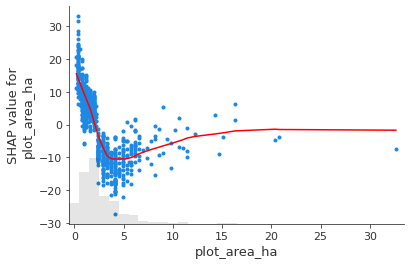

In [84]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
ax.plot(lowess[:,0], lowess[:,1], color="red", )
shap.plots.scatter(shap_values2[:,"plot_area_ha"], ax=ax, ylabel='SHAP value', show=True, xmax=20)


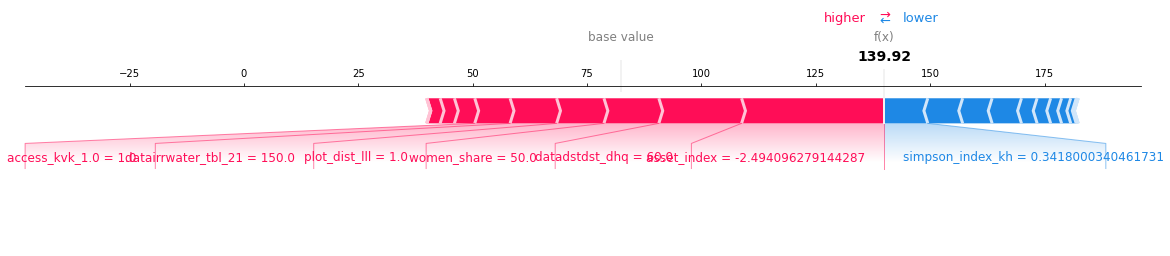

In [91]:
#https://github.com/AidanCooper/shap-analysis-guide/blob/4775e9a34b3120dde8d7b99e6bb5a9e4d2d903ac/analysis.ipynb
shap.plots.force(shap_values2[1], show=False, matplotlib=True)
#plt.gcf()

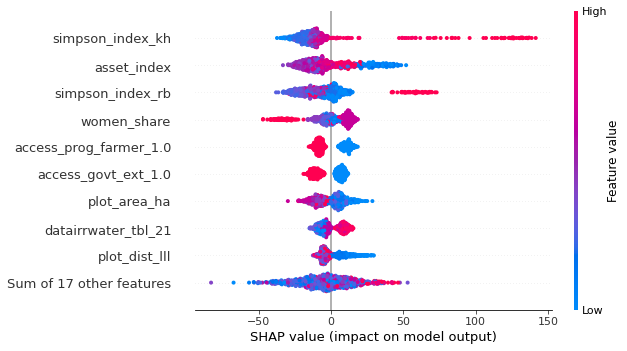

In [95]:
shap.plots.beeswarm(shap_values2)

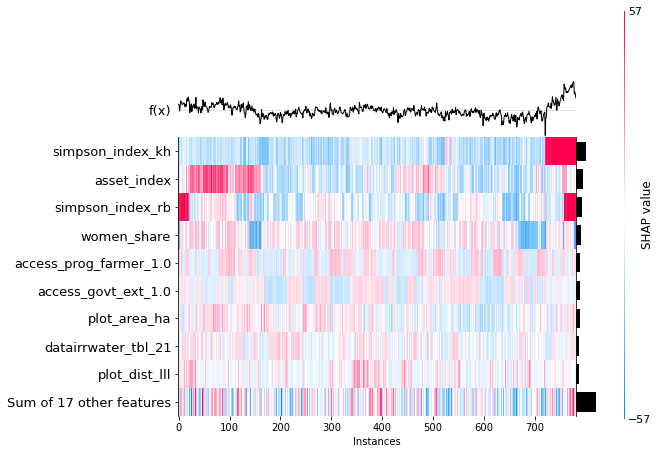

In [94]:
shap.plots.heatmap(shap_values2[:1000])

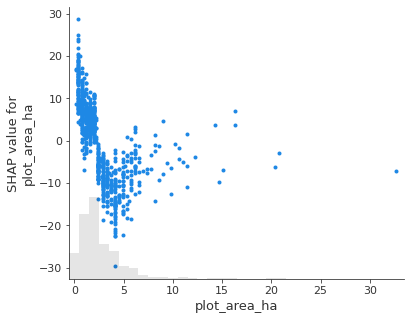

In [96]:
shap.plots.scatter(shap_values2[:,"plot_area_ha"])

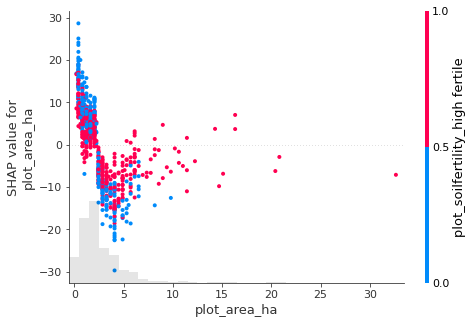

In [97]:
shap.plots.scatter(shap_values2[:,"plot_area_ha"], color=shap_values2)

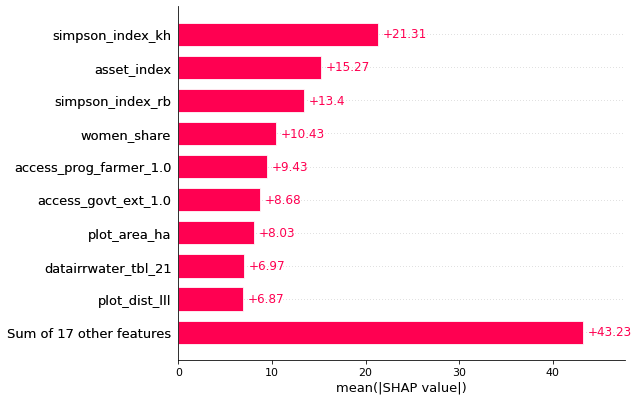

In [98]:
shap.plots.bar(shap_values2)

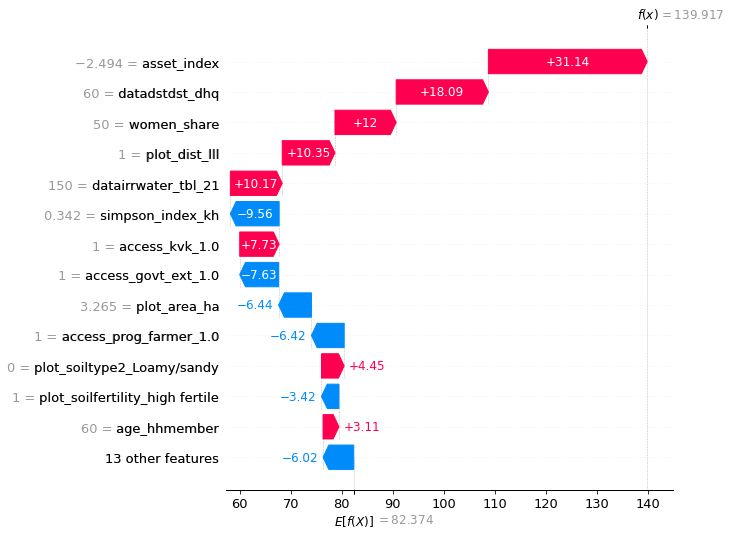

In [99]:
shap.plots.waterfall(shap_values2[1,:], max_display=14)

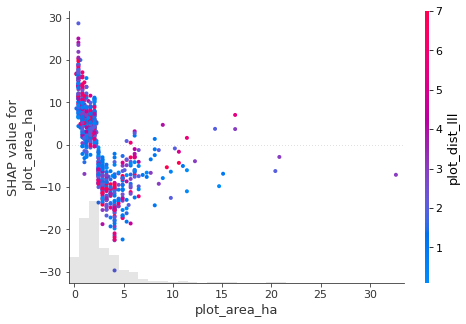

In [101]:
shap.plots.scatter(shap_values2[:,"plot_area_ha"], color=shap_values2[:,"plot_dist_lll"])

In [182]:
#!pip install shap
#Codes for shapley
#https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

In [102]:
# use causal forest model to estimate treatment effects  
treatment_effects = causal_forest.effect(X1)
# calculate lower bound and upper bound confidence intervals 
lb, ub = causal_forest.effect_interval(X1, alpha=0.05)

# convert arrays to pandas dataframes for plotting
te_df = pd.DataFrame(treatment_effects, columns=['cate'])
lb_df = pd.DataFrame(lb, columns=['lb'])
ub_df = pd.DataFrame(ub, columns=['ub'])

In [103]:
te_df.shape

In [104]:
ub_df.shape

In [105]:
ub_df.index

RangeIndex(start=0, stop=781, step=1)

In [106]:
te_df.index

RangeIndex(start=0, stop=781, step=1)

In [107]:
df.shape

In [108]:
lb_df.index

RangeIndex(start=0, stop=781, step=1)

In [109]:
df2 = pd.merge(te_df, lb_df, left_index = True, right_index = True)

In [110]:
df2.shape

In [111]:
df3 = pd.merge(ub_df, df2, left_index = True, right_index = True)

In [112]:
#df2 = pd.merge(lb_df, df2, left_index = True, right_index = True)

In [113]:
df3.head()

,ub,cate,lb
0,300.933159,18.300005,-264.333149
1,356.226794,141.432398,-73.361999
2,223.495247,46.760812,-129.973622
3,176.185821,-2.103570,-180.392961
4,256.180762,106.474948,-43.230865


In [114]:
df4= df3.mean()
print(df4)

ub      292.527298
cate     68.690533
lb     -155.146233
dtype: float64


In [115]:
# merge dataframes and sort 
#df = te_df.merge(lb_df, left_on=te_df.index, right_on=lb_df.index, how='left')
#df.drop(columns=['key_0'], inplace=True)
#df = df.merge(ub_df, left_on=df.index, right_on=ub_df.index, how='left')
#df2.drop(columns=['cate'], inplace=True)
df3.sort_values('cate', inplace=True, ascending=True)

df3.reset_index(inplace=True, drop=True)

# calculate rolling mean
z = df3.rolling(window=30, center=True).mean()

In [116]:
import matplotlib.pyplot as plt

# set plot size
fig, ax = plt.subplots(figsize=(12, 8))
# plot lines for treatment effects and confidence intervals
ax.plot(z['cate'],
        marker='.', linestyle='-', linewidth=0.5, label='CATE', color='indigo')
ax.plot(z['lb'],
        marker='.', linestyle='-', linewidth=0.5, color='steelblue')
ax.plot(z['ub'],
        marker='.', linestyle='-', linewidth=0.5, color='steelblue')
# label axes and create legend
ax.set_ylabel('Treatment Effects')
ax.set_xlabel('Number of observations')
ax.legend()

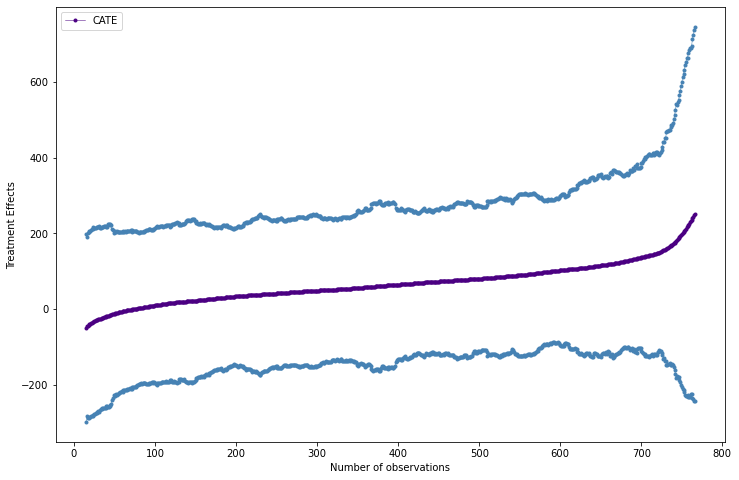

In [117]:
fig